<a href="https://colab.research.google.com/github/sarasantosds/analise-redes-comunicacao/blob/main/An%C3%A1lise_de_Rede_de_Comunica%C3%A7%C3%A3o_por_E_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise de Rede de E-mail dos anos: 2003 à 2005


Essa é uma rede direcionada não ponderada, por essa razão o número de e-mails enviados e recebidos será associdado ao grau de cada vértice, se houvesse peso nas arestas, poderíamos considerá-los como sendo a quantidade de e-mails enviados e recebidos.


Você encontra o arquivo neste site: https://snap.stanford.edu/data/email-EuAll.html

**Recomendo fazer o tratamento do arquivo txt presente no .gz para evitar análises equivocadas.**

# ATENÇÃO 🚩

Essa rede fez parte de um estudo sobre padrões de crescimento em redes do mundo real. O autor do estudo sugere que a rede disponibilizada no repositório é uma nova rede gerada a partir da rede de e-mails da instituição de pesquisa européia.

A geração da rede segue o padrão de crescimento da rede de e-mails da instituição de pesquisa européia, a anonimização mencionada pelo autor diz respeito as técnicas segurança e privacidade utilizadas ao ter acesso aos dados de e-mails da instituição de pesquisa européia, mas não seria o caso de esses e-mails anonimizados serem os mesmos presentes no conjunto de dados disponibilizados no repositório, em outras palavras seria como simular o padrão de crescimento da rede no mesmo período de tempo do conjunto de dados original, no caso durante 18 meses.

Logo a análise presente neste notebook não relação com a rede real de e-mails da instituição de pesquisa européia, portanto a análise é feita sobre 265.214 e-mails (genéricos) e 420.045 envios/recebimentos no total.  Dito isto foi visualizado nas amostras coletadas a problematização:
*Como propagar uma informação importante em redes esparsas ?*

Lembrando que redes esparsas não são característica inerentes as redes direcionadas, mas pode ocorrer com maior frequência dada unidirecionalidade das relações.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests


In [ ]:
df = pd.read_csv("Email-EuAll.txt", header=None, sep='\t')
G = nx.DiGraph()
for row in df.itertuples(index=False):
  G.add_edge(int(row[0]), int(row[1]))
print(G)

DiGraph with 265214 nodes and 420045 edges


### Analisando a densidade da rede:

Densidade muito próxima de zero, ou seja, uma densidade baixa que caracteriza uma rede esparsa com poucas conexões.

In [ ]:
print(round(nx.density(G),5) * 100,"%")

0.001 %


A baixa conexão é confirmada ao verificarmos se a rede é fortemente conectada e o resultado ser: False. Se a rede fosse fortemente conectada provavelmente haveria uma densidade alta e poderíamos ter caminhos em quaisquer pares de nós.

In [ ]:
nx.is_strongly_connected(G)

False

### Analisando Centralidade de Grau:

A centralidade de grau nos ajuda a visualizar o nó que detêm a maioria das conexões, esse dado é importante quando se quer por exemplo: vender um produto, fazer uma boa notícia chegar ao maior número de pessoas, expressar uma opinião nas redes sociais que alcance grande número de usuários, etc.

Na teoria dos grafos o nó de maior centralidade de grau é conhecido como nó hub, em uma rede não temos apenas um nó hub, contudo temos em menos número do que os nós que não são hubs, ou seja, nós que possuem poucas conexões ou nenhuma conexão (nós isolados).

Os nós hubs também nos ajuda a compreender a propagação de doenças e a buscar medidas de prevenção, por exemplo. No decorrer da análise dessa rede iremos  explorar centralidade de grau de modo geral tanto de entrada quanto de saída, já que estamos analisando uma rede direcionada, isso vai nos ajudar a pensar em como poderemos melhor a nossa comunicação.


In [ ]:
# nx.degree_centrality(G)
centralidade_grau = nx.degree_centrality(G)

In [ ]:
maior_centralidade = max(centralidade_grau, key = centralidade_grau.get)
print(maior_centralidade)

179170


In [ ]:
maior_grau = G.degree(179170)
print(f"Este nó: {maior_centralidade} tem {maior_grau} conexões")

Este nó: 179170 tem 7636 conexões


Apesar do nó: 179170 ter 7636 conexões, ainda é muito pouco, isso reforça mais uma vez a densidade baixa.


Agora iremos verificar se este usuário envia muitos e-mails e/ou recebe muitos e-mails.

In [ ]:
# Verificamos que este node recebeu muitos e-mails
grau_maior_entrada = G.in_degree(179170)
print(f"Este nó: {maior_centralidade} recebeu {grau_maior_entrada} e-mails")

Este nó: 179170 recebeu 7631 e-mails


In [ ]:
# Verificamos que este node enviou poucos e-mails
grau_maior_saida = G.out_degree(179170)
print(f"Este nó: {maior_centralidade} enviou {grau_maior_saida} e-mails")

Este nó: 179170 enviou 5 e-mails


### Análise de Agrupamento Local

In [ ]:
agrupamento_local = nx.clustering(G, nodes=179170)
print(f"Este nó: {maior_centralidade} tem {agrupamento_local:.2f}% de chance formar grupo na rede")

Este nó: 179170 tem 0.00% de chance formar grupo na rede


Vimos que apesar de ser um nó com alta centralidade de grau, este não formaria grupos, isso é respondido pelo fato de que os destinatários de seus e-mails não são os mesmos remetentes, ou seja, ele envia e-mail para pessoas diferentes daquelas que enviam e-mail para ele, se fossem similares poderia formar um grupo de e-mail por exemplo, além disso abaixa clusterização indica que há quase nenhuma possibilidade de pessoas que entram em contato com ele formar grupo com as pessoas as quais ele envia e-mail.

### Análise de Agrupamento Global

Existe uma chance bem pequena da rede formar grupos, ou seja, de usuários conectados a outros usuários se conectar a usuários em comum ou a estar presente em novos grupos de usuários.

Esse baixo agrupamento local e global confere a rede não ser fortemente conectada.

In [ ]:
agrupamento_global = nx.transitivity(G)
print(f"Está rede tem: {agrupamento_global:.2f}% chance de formar grupos na rede")

Está rede tem: 0.03% chance de formar grupos na rede


In [ ]:
agrupamento_medio = nx.average_clustering(G)
print(f"Está rede em média {round(agrupamento_medio,2)} agrupamento")

Está rede em média 0.06 agrupamento


Ou seja, dificilmente a rede como um todo irá formar grupos com facilidade, isso quer dizer que usuários que falam com "João", dificilmente falaram entre si, eu disse que dificilmente, mas não impossível. Vamos analisar outras partes da rede como por exemplo: Componente Fortemente Conexa.

### Análise da Componente Fortemente Conexa

Apesar da rede não ser fortemente conectada, não quer dizer que não haja componentes fortemente conexas.

In [ ]:
componente_conexa =nx.number_strongly_connected_components(G)
print(f"Está rede tem {componente_conexa} componentes fortemente conexas")

Está rede tem 231000 componentes fortemente conexas


Vamos analisar somente a maior componente conexa, para isso criamos um subgrafo contendo os nós da maior componente conexa e suas arestas.

In [ ]:
maior_componente_conexa = nx.strongly_connected_components(G)
nodes = max(maior_componente_conexa, key=len)
H = G.subgraph(nodes)
print(H)

DiGraph with 34203 nodes and 151930 edges


Abaixo vemos quantos nós do grafo o subgrafo contém, lembrando que esse subgrafo é feito a partir da maior componente conexa que tem: 34.203 nós e 151.930 arestas.

In [ ]:
percentual_nos = H.number_of_nodes() / G.number_of_nodes()
print(f"Este subgrafo tem {percentual_nos:.2f}% dos nós")

Este subgrafo tem 0.13% dos nós


In [ ]:
percentual_arestas = H.number_of_edges() / G.number_of_edges()
print(f"Este subgrafo tem {percentual_arestas:.2f}% das arestas")

Este subgrafo tem 0.36% das arestas


### Análise da Distribuição de Graus do Dígrafo G

A distribuição de graus será calculada pelos graus de entrada e graus de saída posteriormente. Para a análise iremos usar uma lista de graus de entrada. Graus de entrada são as arestas que saem de um nó e entram em outro nó: A -> B, a análise é sobre o recebimento desta aresta, não sobre a saída desta aresta. Para realizar a descrição estatística da lista convertemos ela para Series que é um conjunto de dados com apenas 1 coluna e várias linhas. Ao convertemos para Series será dado índices, favor não confundir com nós, nesta lista estamos apenas usando o grau para cada nó na lista de grau de entrada.

In [ ]:
in_degree_list = [degree for node, degree in G.in_degree]
in_degree_list = pd.Series(in_degree_list)
in_degree_list.describe()

,0
count,265214.000000
mean,1.583796
std,36.527219
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,7631.000000


Podemos conferir que o maior grau de entrada confere com o nó hub: 179170. Temos 75% da rede com pelo menos um grau de entrada, isso quer dizer que 75% recebeu ao menos 1 e-mail. Contudo vemos que existe nós que não receberam e-mails.

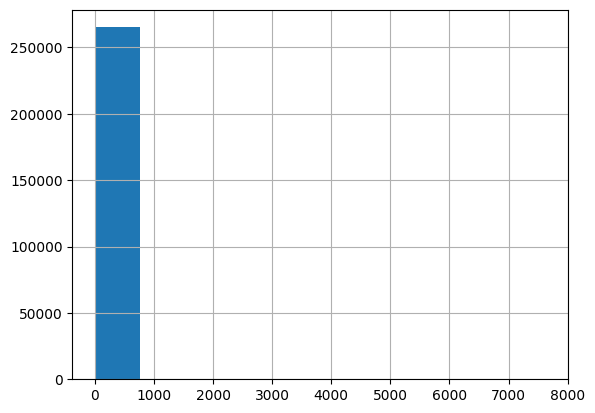

In [ ]:
in_degree_list.hist()
plt.show()

Agora vamos analisar os graus de saída da rede como um todo. Vemos que entre 25% a 75% enviou ao menos 1 e-mail, contudo existe um nó que enviou 930 e-mails e como podemos ver também temos nó que não enviou nenhum e-mail.

In [ ]:
out_degree_list = [degree for node, degree in G.out_degree]
out_degree_list = pd.Series(out_degree_list)
out_degree_list.describe()

,0
count,265214.000000
mean,1.583796
std,9.984003
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,930.000000


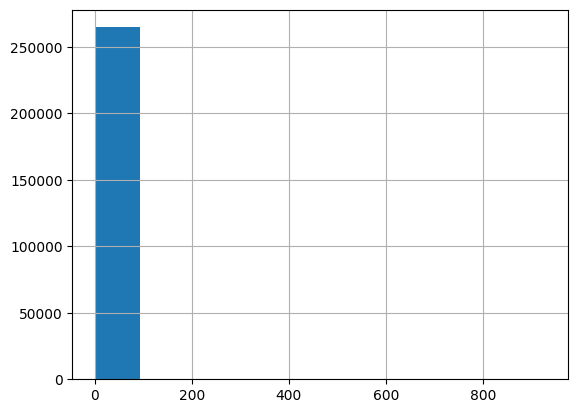

In [ ]:
out_degree_list.hist()
plt.show()

Abaixo temos um gráfico em escala logarítmica que nos ajuda a visualizar se a rede segue uma distribuição de graus em lei de potência, em outras palavras veremos se a rede é desigual, caso a rede seja desigual veremos que uma parte mínima dos nós terá grau muito alto e uma grande parte dos nós terá grau muito baixo. A nossa rede gerou um gráfico que mostra em alguns momentos seguir a lei de potência (caracterizada por uma reta) e em outros momentos principalmente na parte final do gráfico se lido de cima para baixo, não temos o seguimento de uma lei de potência o que indica que nessa parte da rede esse número de nós tem a distribuição de graus de forma uniforme e não desigual.

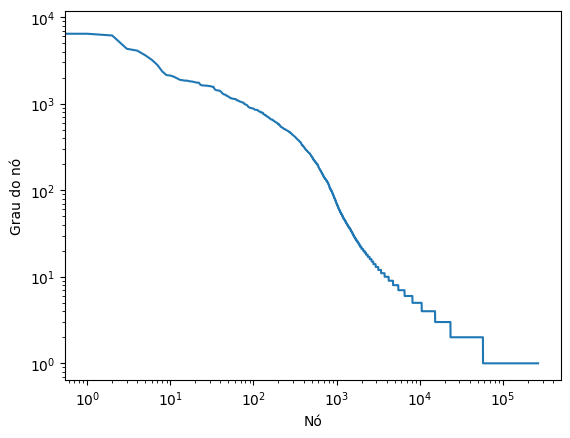

In [ ]:
degree_list = [degree for node, degree in G.degree]
degree_list = pd.Series(degree_list)
y = degree_list.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Nó')
plt.ylabel('Grau do nó');

### Análise de Distâncias

Abaixo estamos buscando o nó com maior grau de saída, isso será importante para entendermos como iremos propagar a informação. Como podemos ver o nó 83 que é o nó com maior grau de saída: envia e-mails para muitas pessoas, contudo recebe bastante e-mails, podemos conferir isso ao analisar o seu grau de entrada. Contudo as informações sobre os graus não nos é suficiente, precisamos buscar saber se o nó 83 envia e-mails para os remetentes que envia e-mails para ele.

In [ ]:
grau_saida = dict(G.out_degree)
for chave, valor in grau_saida.items():
  if valor == 930:
    print("O nó {0} tem grau de saída: {1}".format(chave,valor))

grau_entrada = dict(G.in_degree)
for chave, valor in grau_entrada.items():
  if chave == 83:
    print("O nó {0} tem grau de entrada: {1}".format(chave,valor))

O nó 83 tem grau de saída: 930
O nó 83 tem grau de entrada: 2696


O diâmetro de um grafo é a excentricidade máxima: a maior distância entre quaisquer par de vértices. A excentricidade é a distância máxima entre quaisquer par de vértices.


Vértices centrais tem excentricidade baixa, ou seja, dado um vértice x consigo em uma distância mínima chegar ao vértice que está no centro do grafo, por outro lado, dado um vértice x consigo em uma distância máxima chegar ao vértice que está na borda do grafo.

Em nossa rede de e-mails não é possível calcular a maior distância por não ser uma rede fortemente conectada, ou seja, existem poucos caminhos entre quaisquer par de vértices, isso evidencia a rede ser esparsa.

**Observação: a distância máxima, assim como a distância mínima é analisada a partir do menor caminho possível entre u e v, essa distância é chamada de distância GEODÉSICA**

In [ ]:
try:
  nx.algorithms.approximation.diameter(G)
except Exception as err:
  print(f"Error: {err}")

Error: DiGraph not strongly connected.


Como podemos ver ao converter para não-direcionada temos ainda a não conectividade da rede isso ocorre porque em uma rede de e-mail a comunicação não é bidirecional em muitos dos casos.

In [ ]:
# convertendo rede direcionada para não-direcionada
nao_direcionada = nx.to_undirected(G)

try:
  nx.algorithms.approximation.diameter(nao_direcionada)
except Exception as err:
  print(f"Error: {err}")

Error: Graph not connected.


Também não é possível calcular a excentricidade pela mesma razão de não podermos calcular o diâmetro. Ainda que coloquemos um nó de partida ou um par de vértices ainda assim não poderá ser calculado, lembrando que estamos analisando a rede como um todo.

In [ ]:
# verificando a excentricidade da rede como um todo sem especificar quaisquer par de nó
try:
  nx.eccentricity(G)
except Exception as err:
  print(f"Error: {err}")

Error: Found infinite path length because the digraph is not strongly connected


In [ ]:
# Verificando a excentricidade entre um par de nó
try:
  distancia_max = nx.eccentricity(G,v=[83, 85])
except Exception as err:
  print(f"Erro: {err}")

Erro: Found infinite path length because the digraph is not strongly connected


Vamos ver o caminho mais curto entre o v: 83 e u: 85, lembrando que isso é somente uma amostra, a rede é muito extensa e seria manualmente inviável buscar o caminho mais curto testando vários pares de vértices. Escolhi o v: 83 por sabermos da sua capacidade de envio de e-mails, logo supondo que queremos enviar um e-mail para o u: 85, mas preciso da validação do v: 83 e posteriormente ele fica encarregado de enviar o e-mail para u: 85

In [ ]:
caminho_mais_curto = nx.shortest_path(G, 83,85)
print(f"Após o usuário 83 validar o e-mail para que ele envie para o usuário 85" ,
f"ele precisará fazer o envio para os demais {caminho_mais_curto}")

Após o usuário 83 validar o e-mail para que ele envie para o usuário 85 ele precisará fazer o envio para os demais [83, 35, 120, 85]


É claro que podemos pensar: não poderíamos encaminhar diretamente ? Sim, se a rede fosse fortemente conectada e houvesse um caminho direto de 83 -> 85, mas não é o que ocorre, pensando no contexto de mundo real: seria o caso de 83 não ter o contato de 85 e precisar contactar usuários que tem contato com pessoas que tem contato com o usuário 85.

### Análise da Maior Componente Fortemente Conexa:

- buscar a centralidade de grau
- verificar os graus de entrada e de saída
- agrupamento local e global
- distribuição de graus
- distâncias

### Análise das centralidades do subgrafo H:

- centralidade de grau
- centralidade de intermediação


Na rede direcionada com um todo tivemos os nós 179170 e 83 como sendo nós com alta centralidade de graus, sendo que 179170 obteve uma maior centralidade de grau de entrada, enquanto que 83 obteve uma maior centralidade de grau de saída. Agora vamos analisar a centralidade de grau do subgrafo H que é formado pela maior componente conexa do dígrafo.

In [ ]:
centralidade_grau_H = nx.degree_centrality(H)
maior_centralidade_grau_H = max(centralidade_grau_H, key=centralidade_grau_H.get)
print(f"O nó com maior grau de centralidade é: {maior_centralidade_grau_H}")

print(f"Grau de Entrada do Nó {maior_centralidade_grau_H} é: {H.in_degree(192)}")
print(f"Grau de Saída do Nó {maior_centralidade_grau_H} é: {H.out_degree(192)}")

O nó com maior grau de centralidade é: 192
Grau de Entrada do Nó 192 é: 788
Grau de Saída do Nó 192 é: 716


Diferente do Dígrafo G, o nosso subgrafo (ele ainda é dígrafo) H temos a centralidade de grau de entrada e de saída sendo maiores para o mesmo nó: 192, isso faz total sentido se lembrarmos que estamos lidando com uma componente gigante (a maior componente conexa) onde um único nó possui a maioria das conexões entre ambos os graus, além de podermos ir de um nó para outro, ou seja, possuímos caminhos entre quaisquer par de nós.

**Mas qual seria a relevância de sabermos isso ?**

Toda, afinal antes estávamos divididos entre 179170 e 83, pensando - Para qual usuário iremos enviar uma informação importante ? - sabemos que 179170 não seria a melhor opção, afinal ele envia poucos e-mails (5), logo pensamos no 83 que envia 930 e-mails, isso em nosso Dígrafo G.

Depois analisamos a nossa componente gigante por uma questão de processamento - quando temos uma rede muito grande, trabalhar com a componente gigante é a melhor recomendação, afinal ela detêm a maioria das conexões- ao analisarmos vimos que 192 envia e recebe e-mails quase que na mesma medida, *será que ele nos ajudaria a enviar uma informação importante ?*

Quando pensamos no envio de informações, não é sobre a maior quantidade isolada de conexões que um nó possui, mas sim compreender se as conexões que esse nó possui, comporta caminhos que levariam a informação para outros nós.

Por exemplo: A -> B,mas se B não se conecta a mais ninguém em questão de envio, de que me adiantaria enviar para A ?, pensamos agora nesse cenário: A -> B -> C, agora me parece interessante enviar uma informação para A, afinal essa informação chegará a C e se C tiver mais conexões essa informações se propagará de forma mais rápida.

In [ ]:
centralidade_intermediacao_H = nx.betweenness_centrality(H, k=2, seed=42)
for node, valor in centralidade_intermediacao_H.items():
  if node == 192:
    print(f"Nó: {node} , Intermediação: {valor:.2f}%")

Nó: 192 , Intermediação: 0.03%


A intermediação do nó 192 em caminhos curtos para irmos de um nó x até  o nó y é muito pequena, não nula, mas muito pequena, o que pode interferir na escolha dele como sendo o propagador da informação, isso porque a intermediação não necessariamente tem a ver com a centralidade de grau, ou seja, posso ter um nó com grande parte das conexões, mas essas conexões não dependerem dele para chegar a um outro nó, além disso podemos ter nós conectados a ele que possuem apenas 1 aresta o que dificultaria fazer a informação se propagar pela rede. Vamos verificar a intermediação do nó 83 do Dígrafo G.

In [ ]:
centralidade_intermediacao_G = nx.betweenness_centrality(G, k=2, seed=42)
for node, valor in centralidade_intermediacao_H.items():
  if node == 83:
    print(f"Nó: {node} , Intermediação: {valor:.2f}%")

Nó: 83 , Intermediação: 0.01%


A intermediação do nó 83 é ainda menor que a intermediação do nó 192. Nossa análise está cada vez mais complexa para encontrarmos um usuário bom para enviar uma informação importante para a rede. Vamos analisar outras métricas.

### Análise da Assortatividade dos Dígrafos

In [ ]:
assortatividade = nx.degree_assortativity_coefficient(H,x="out",y="in")

print(f"A Componente formente conexa é um subgrafo: Heterogêneo, porque sua assortatividade é: {assortatividade:.2f}")

A Componente formente conexa é um subgrafo: Heterogêneo, porque sua assortatividade é: -0.34


In [ ]:
assortatividade = nx.degree_assortativity_coefficient(G,x="out",y="in")

print(f"O dígrafo G é: Heterogêneo, porque sua assortatividade é: {assortatividade:.2f}")

O dígrafo G é: Heterogêneo, porque sua assortatividade é: -0.21


Ao falarmos sobre *Assortatividade* estamos falando sobre a correlação entre os nós. A correlação de nós é feita a partir da análise do número de graus, isso quer dizer que:

- Graus altos que se conectam com Graus altos classifica a rede como: assortativa;
- Graus altos que se conectam com Graus altos (vice-versa) classifica a rede como: dissassortativa.

Em medida temos:

- Asssortatividade positiva: Rede Homogênea
- Assortatiividade negativa: Rede Heterogênea
- Assortatividade nula: Rede não homogênea e nem heterogênea.


No caso da nossa rede ela é: Heterogênea, ou seja, os graus altos tem tendência de se conectar com graus baixos, ou seja, nós que possuem poucas conexões.


Opa, veja, se a nossa rede é heterogênea, isso quer dizer que as conexões altas são feitas em sua maioria de conexões baixas, ou seja, a informação não tem um grande alcance em nossa rede.

### Análise do agrupamento do subgrafo H

Vamos analisar as métricas de agrupamento:

- Agrupamento local nos diz que o nó 192 tem chances mínimas de formar grupos, ou seja, de seus nós se conectarem entre eles. Por exemplo envio informação para de A para B e C, mas se precisar que B ou C envie informação entre eles não será possível.

- Agrupamento global nos diz que a rede tem chances mínimas de formar grupos. O que nos ajuda a visualizar que os usuários da instituição de pesquisa não se conhecem tanto, apenas "conhecem" os  usuários os quais trocam e-mails ou enviam/recebem e-mails. O que podemos deduzir de forma hipotética que a rede de e-mails analisada pude ser entre os usuários da instiuição e funcionários da instituição, mas não entre usuários e usuários ou que esses usuários pode estar segmentados.

- Agrupamento médio nos diz que em média 0.2% dos nós forma grupos na rede, e quando falamos grupos, estamos nos referindo a triângulos, ou seja, trios fechados.

In [ ]:
agrupamento_local_H = nx.clustering(H,192)
print(f"As chances do Nó {maior_centralidade_grau_H} formar grupos é: {agrupamento_local_H:.2f}%")

As chances do Nó 192 formar grupos é: 0.01%


In [ ]:
agrupamento_global_H = nx.transitivity(H)
print(f"As chances do subgrafo H formar grupos é: {agrupamento_global_H:.2f}%")

As chances do subgrafo H formar grupos é: 0.04%


In [ ]:
agrupamento_medio_H = nx.average_clustering(H)
print(f"Este subgrafo tem em média: {agrupamento_medio_H:.2f}%")

Este subgrafo tem em média: 0.23%


### Análise da Distribuição de Graus do subgrafo H



In [ ]:
in_degree_list_H = [degree for node, degree in H.in_degree]
in_degree_list_H = pd.Series(in_degree_list_H)
in_degree_list_H.describe()

,0
count,34203.000000
mean,4.442008
std,24.443427
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,788.000000


In [ ]:
out_degree_list_H = [degree for node, degree in H.out_degree]
out_degree_list_H = pd.Series(out_degree_list_H)
out_degree_list_H.describe()

,0
count,34203.000000
mean,4.442008
std,21.477202
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,716.000000


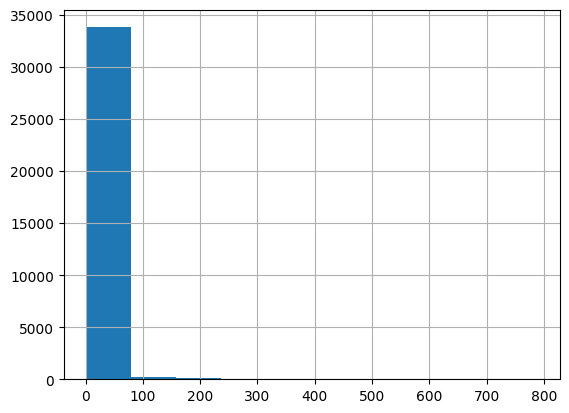

In [ ]:
in_degree_list_H.hist()
plt.show()

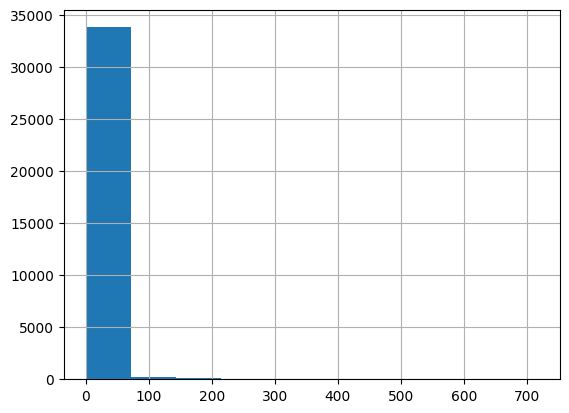

In [ ]:
out_degree_list_H.hist()
plt.show()

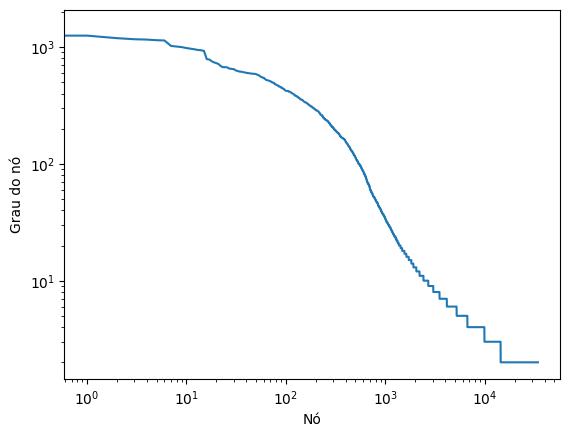

In [ ]:
degree_list = [degree for node, degree in H.degree]
degree_list = pd.Series(degree_list)
y = degree_list.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Nó')
plt.ylabel('Grau do nó');

A análise da distribuição de graus do subgrafo nos diz que não há um seguimento de lei de potência constante, ou seja, apenas em uma parte dos nós existe uma constância no número de graus. Outra observação é que neste subgrafo uma boa parte dos nós: 75% possuem 2 conexões, sendo que a maior conexão está justamento no nó 192.

### Análise das distâncias da componente formetemente conexa

In [ ]:
try:
  diametro_H = nx.algorithms.approximation.diameter(H)
  print(f"A excentricidade máxima é: {diametro_H}")
except Exception as err:
  print(f"Error: {err}")

A excentricidade máxima é: 10


In [ ]:
try:
  excentricidade_H = nx.eccentricity(H, v=[192,200])
  print(f"Maiores distâncias encontradas entre o nó 192 e 200: {excentricidade_H}")
except Exception as err:
  print(f"Error: {err}")

Maiores distâncias encontradas entre o nó 192 e 200: {192: 5, 200: 6}


In [ ]:
try:
  radius_H = nx.radius(H,excentricidade_H)
  print(f"A menor distância encontrada entre o nó 192 e 200: {radius_H}")
except Exception as err:
  print(f"Error: {err}")

A menor distância encontrada entre o nó 192 e 200: 5


O interessante de analisar o diâmetro, a excentricidade e o raio do subgrafo dado os pares {v: 192, u: 200} é compreender que a maior distância encontrada na rede é 10, mas a maior distância encontrada entre v e u é 6, e que a menor distância calculada pelo raio entre v e u é 5. Ou seja, 10 é a distância máxima da rede dado um vértice v até um vértice periférico. Por que não seria a distância máxima do periférico até o centro ? Porque os vértices periféricos ficam mais próximo dos vértices centrais e mais distantes do vértices periféricos que provalvemente estarão na outro borda do grafo.

# Conclusão:

Temos uma rede esparsa com baixa densidade, não conectada, heterogênea, com baixa tendência de agrupamento, com distribuição de graus em lei de potência não constante, com o cálculo das distâncias prejudicado pela falta de conectividade. Temos graus de entrada e saída distintos em sua maioria.


**Nosso problema é: Como propagar informação por esta rede ?**

*Possível solução:* Enviar a informação para nós com alto grau de saida, independentemente se os nós os quais estão conectados formarem apenas uma aresta, isso porque podemos espalhar a informação, mas não conseguiremos ou tentaremos com muito custo fazer uma informação chegar até outro usuário por meio de um caminho, precisamos então, focar na divulgação da informação pensando em sua relevância e simultaneidade, ou seja, enviar ao mesmo tempo  para os nós com maior grau de saída.